In [1]:
#I used public data available from the StockX Data Contest, which provided me with a dataset 
#of 99,956 transactions that occurred between 2017 and 2019. This dataset included two prominent 
#brands, Yeezy and Nike Off-White, as well as over 50 different sneaker styles.

#In an effort to enhance the dataset, I manually gathered information on colorways and the number of sales from 
#the StockX website. Subsequently, I converted style and color information into dummy variables. 

#For my modeling purposes, The "price premium" is calculated as the difference between the sale price of a 
#product (in this case, sneakers) and its original retail price. It represents how much more (or less) a 
#customer is willing to pay for a product compared to its original retail price. In other words, it quantifies 
#the additional amount that buyers are willing to spend, or the markup, above the standard retail cost for a 
#particular product.

#The input variables for my analysis included the number of days since  release, sneaker style, colorway, 
#shoe size, and the number of sales. These variables allowed me to develop models and gain insights into 
#the factors influencing sneaker prices in this market.

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
stockx_data = pd.read_excel("./StockX-Data-Contest-2019.xlsx",sheet_name="Raw Data")

In [3]:
stockx_data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California


In [4]:
stockx_data['Sneaker Name'].value_counts()

adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Nike-Air-Presto-Off-White-Black-2018                  1884
Nike-Air-Presto-Off-White-White-2018                  1883
Nike-Air-VaporMax-Off-White-2018                      1591
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                 1398
Nike-Zoom-Fly-Off-White-Pink                          1359
Nike-Air-VaporMax-Off-White-Black                     13

In [5]:
stockx_data['Buyer Region'].value_counts()

California              19349
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Illinois                 3782
Pennsylvania             3109
Massachusetts            2903
Michigan                 2762
Virginia                 2058
Ohio                     1890
Maryland                 1870
Washington               1863
Georgia                  1846
Arizona                  1398
North Carolina           1344
Delaware                 1242
Connecticut              1110
Indiana                  1026
Colorado                  954
Wisconsin                 840
Nevada                    790
Tennessee                 731
Minnesota                 725
Missouri                  660
South Carolina            570
Louisiana                 537
Kentucky                  488
Iowa                      460
Alabama                   457
Utah                      450
Oklahoma                  412
Hawaii    

In [6]:
color = pd.read_excel("./supplemental_data_colorway.xlsx",sheet_name="Sheet1")

In [7]:
color.head

<bound method NDFrame.head of                                                 Style  Black  White  Grey  \
0                Adidas-Yeezy-Boost-350-Low-V2-Beluga    NaN    NaN   1.0   
1         Adidas-Yeezy-Boost-350-V2-Core-Black-Copper    1.0    NaN   NaN   
2          Adidas-Yeezy-Boost-350-V2-Core-Black-Green    1.0    NaN   NaN   
3            Adidas-Yeezy-Boost-350-V2-Core-Black-Red    1.0    NaN   NaN   
4       Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017    1.0    NaN   NaN   
5          Adidas-Yeezy-Boost-350-V2-Core-Black-White    1.0    1.0   NaN   
6               Adidas-Yeezy-Boost-350-V2-Cream-White    NaN    1.0   NaN   
7                     Adidas-Yeezy-Boost-350-V2-Zebra    1.0    1.0   NaN   
8                 Adidas-Yeezy-Boost-350-Low-Moonrock    NaN    NaN   1.0   
9                           Nike-Air-Max-90-Off-White    NaN    1.0   NaN   
10                          Nike-Air-Presto-Off-White    1.0    1.0   NaN   
11                        Nike-Air-VaporMax-Of

In [8]:
# --- Data Cleaning ---
# calculate price premium: (sale price - retail price)/retail price
stockx_data["Price_Percentage_change"] = (stockx_data['Sale Price'] - stockx_data['Retail Price'])/stockx_data['Retail Price']

# calculate days since release: order data - release date
#stockx_data["Days_Since_Release"] = (pd.to_datetime(stockx_data['Order Date']) - pd.to_datetime(stockx_data['Release Date']))/np.timedelta64('1','D')

# --- style variables ---
# style: v2
stockx_data["yeezy"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Yeezy' in x.split("-") else 0)
# style: airjordan
stockx_data["airjordan"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Jordan' in x.split("-") else 0)
# style: airforce
stockx_data["airforce"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Force' in x.split("-") else 0)
# style: airmax90
stockx_data["airmax90"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if '90' in x.split("-") else 0)
# style: airmax97
stockx_data["airmax97"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if '97' in x.split("-") else 0)
# style: presto
stockx_data["presto"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Presto' in x.split("-") else 0)
# style: vapormax
stockx_data["vapormax"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'VaporMax' in x.split("-") else 0)
# style: blazer
stockx_data["blazer"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Blazer' in x.split("-") else 0)
# style: zoom
stockx_data["zoom"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Zoom' in x.split("-") else 0)
# style: zoom
stockx_data["react"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'React' in x.split("-") else 0)

# --- state variables ---
# creating the california variable
stockx_data["California"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'California' in x else 0)
# creating the new_york variable
stockx_data["New York"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'New York' in x else 0)
# creating the oregon variable
stockx_data["Oregon"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Oregon' in x else 0)
# creating the florida variable
stockx_data["Florida"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Florida' in x else 0)
# creating the texas variable
stockx_data["Texas"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Texas' in x else 0)
# creating the other_state variable
above5pct_states = ["California", "New York", "Oregon", "Florida", "Texas"]
stockx_data["Other States"] = pd.Series(list(map(int,~stockx_data["Buyer Region"].isin(above5pct_states))))


In [9]:
stockx_data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Price_Percentage_change,yeezy,...,vapormax,blazer,zoom,react,California,New York,Oregon,Florida,Texas,Other States
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,3.986364,1,...,0,0,0,0,1,0,0,0,0,0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,2.113636,1,...,0,0,0,0,1,0,0,0,0,0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,2.136364,1,...,0,0,0,0,1,0,0,0,0,0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,3.886364,1,...,0,0,0,0,0,0,0,0,0,1
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,2.763636,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon,1.568182,1,...,0,0,0,0,0,0,1,0,0,0
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California,1.718182,1,...,0,0,0,0,1,0,0,0,0,0
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York,1.750000,1,...,0,0,0,0,0,1,0,0,0,0
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California,1.954545,1,...,0,0,0,0,1,0,0,0,0,0


In [10]:
stockx_data = stockx_data.merge(color, left_on = 'Sneaker Name', right_on = 'Style', how = 'left')

In [11]:
stockx_data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Price_Percentage_change,yeezy,...,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,Website,Product Line
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,3.986364,1,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1857,https://stockx.com/adidas-yeezy-boost-350-v2-s...,Adidas Yeezy
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,2.113636,1,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,560,https://stockx.com/adidas-yeezy-boost-350-v2-c...,Adidas Yeezy
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,2.136364,1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,520,https://stockx.com/adidas-yeezy-boost-350-v2-c...,Adidas Yeezy
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,3.886364,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808,https://stockx.com/adidas-yeezy-boost-350-v2-c...,Adidas Yeezy
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,2.763636,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2153,https://stockx.com/adidas-yeezy-boost-350-v2-c...,Adidas Yeezy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon,1.568182,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085,https://stockx.com/adidas-yeezy-boost-350-v2-s...,Adidas Yeezy
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California,1.718182,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085,https://stockx.com/adidas-yeezy-boost-350-v2-s...,Adidas Yeezy
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York,1.750000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085,https://stockx.com/adidas-yeezy-boost-350-v2-s...,Adidas Yeezy
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California,1.954545,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085,https://stockx.com/adidas-yeezy-boost-350-v2-s...,Adidas Yeezy


In [12]:
stockx_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99956 entries, 0 to 99955
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order Date               99956 non-null  datetime64[ns]
 1   Brand                    99956 non-null  object        
 2   Sneaker Name             99956 non-null  object        
 3   Sale Price               99956 non-null  float64       
 4   Retail Price             99956 non-null  int64         
 5   Release Date             99956 non-null  datetime64[ns]
 6   Shoe Size                99956 non-null  float64       
 7   Buyer Region             99956 non-null  object        
 8   Price_Percentage_change  99956 non-null  float64       
 9   yeezy                    99956 non-null  int64         
 10  airjordan                99956 non-null  int64         
 11  airforce                 99956 non-null  int64         
 12  airmax90                 99956 n

In [13]:
# drop columns that have been coded
# keep retail and sales prices for further analysis
# stockx_data = stockx_data.drop(columns = ['Retail Price','Order Date', 'Brand','Sneaker Name', 'Release Date', 'Buyer Region',
#                                          'Website', 'Product Line', 'Style','weeknum', 'Nike Air Force', 'Adidas Yeezy', 
#                                           'Nike Air Max', 'Nike Zoom','Nike Air VaporMax', 'Nike Blazers', 'Air Jordan', 
#                                           'Nike React','Nike Presto'])
stockx_data = stockx_data.drop(columns = ['Order Date', 'Brand','Sneaker Name','Buyer Region',
                                         'Website', 'Product Line', 'Style'])

In [14]:
stockx_data

,Sale Price,Retail Price,Release Date,Shoe Size,Price_Percentage_change,yeezy,airjordan,airforce,airmax90,airmax97,...,Grey,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales
0,1097.0,220,2016-09-24,11.0,3.986364,1,0,0,0,0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1857
1,685.0,220,2016-11-23,11.0,2.113636,1,0,0,0,0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,560
2,690.0,220,2016-11-23,11.0,2.136364,1,0,0,0,0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,520
3,1075.0,220,2016-11-23,11.5,3.886364,1,0,0,0,0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808
4,828.0,220,2017-02-11,11.0,2.763636,1,0,0,0,0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,565.0,220,2018-12-26,8.0,1.568182,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085
99952,598.0,220,2018-12-26,8.5,1.718182,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085
99953,605.0,220,2018-12-26,5.5,1.750000,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085
99954,650.0,220,2018-12-26,11.0,1.954545,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6085


In [15]:
# turn all the nan value to the 0
stockx_data = stockx_data.fillna(0)

In [16]:
stockx_data['Release Date'] = pd.to_datetime(stockx_data['Release Date'], infer_datetime_format=True)


In [17]:
year = stockx_data['Release Date'].dt.year
print(year)
print("-------------------")
print(year.unique())

0        2016
1        2016
2        2016
3        2016
4        2017
         ... 
99951    2018
99952    2018
99953    2018
99954    2018
99955    2018
Name: Release Date, Length: 99956, dtype: int64
-------------------
[2016 2017 2015 2018 2019]


In [18]:
stock_train = stockx_data[stockx_data['Release Date'].dt.year < 2019]
stock_test = stockx_data[stockx_data['Release Date'].dt.year >= 2019]

print(stock_train.shape, stock_test.shape)

(98585, 33) (1371, 33)


In [19]:
def plot_entire_series(x, y, **kwargs):
    
    plt.figure(figsize=(16, 4))
    plt.plot(x, y, linewidth=2, color='black')
    
    for key, value in kwargs.items():
        plt.plot(x, value, linewidth=2, color=key)
        
    plt.xlabel('Release Date', fontsize=16)
    plt.ylabel('Price_Percentage_change', fontsize=16)
    plt.show()
    
    return None

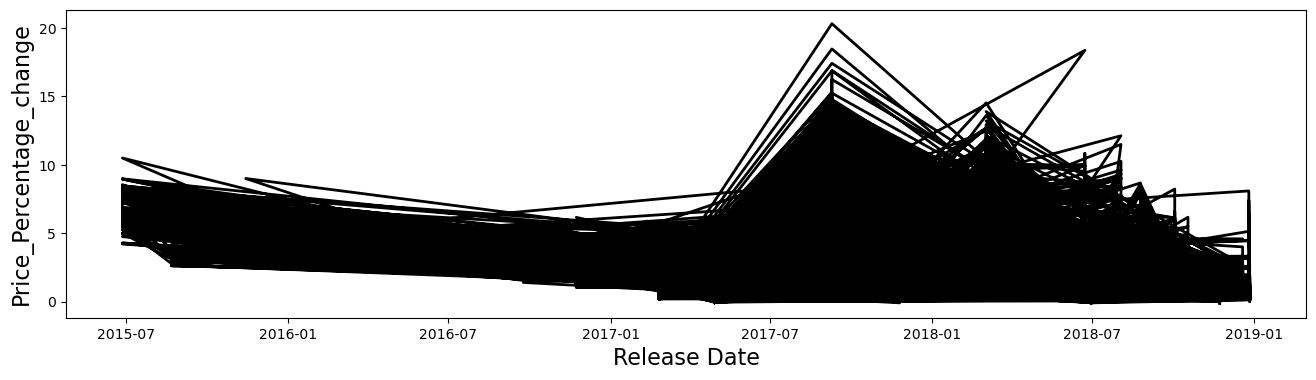

In [20]:
x = stock_train['Release Date'].to_numpy()
y = stock_train['Price_Percentage_change'].to_numpy()

plot_entire_series(x, y)

In [21]:
#Linear trend
time_period = list(range(len(stock_train)))

stock_train_lm = stock_train.copy()
stock_train_lm['TimePeriod'] = time_period
stock_train_lm.tail()

,Sale Price,Retail Price,Release Date,Shoe Size,Price_Percentage_change,yeezy,airjordan,airforce,airmax90,airmax97,...,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,TimePeriod
99951,565.0,220,2018-12-26,8.0,1.568182,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085,98580
99952,598.0,220,2018-12-26,8.5,1.718182,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085,98581
99953,605.0,220,2018-12-26,5.5,1.750000,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085,98582
99954,650.0,220,2018-12-26,11.0,1.954545,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085,98583
99955,640.0,220,2018-12-26,11.5,1.909091,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6085,98584


In [22]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Price_Percentage_change ~ TimePeriod', data=stock_train_lm).fit()

print(lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Price_Percentage_change   R-squared:                       0.046
Model:                                 OLS   Adj. R-squared:                  0.046
Method:                      Least Squares   F-statistic:                     4717.
Date:                     Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                             18:22:15   Log-Likelihood:            -1.7837e+05
No. Observations:                    98585   AIC:                         3.567e+05
Df Residuals:                        98583   BIC:                         3.568e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

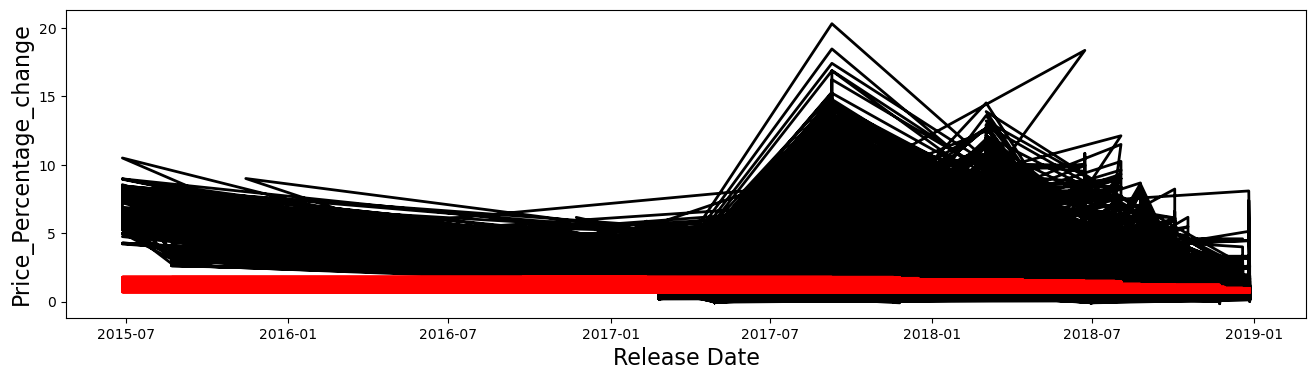

In [23]:
x = stock_train['Release Date'].to_numpy()
y = stock_train['Price_Percentage_change'].to_numpy()
y_pred = lm.predict(stock_train_lm).to_numpy()

plot_entire_series(x, y, red=y_pred)

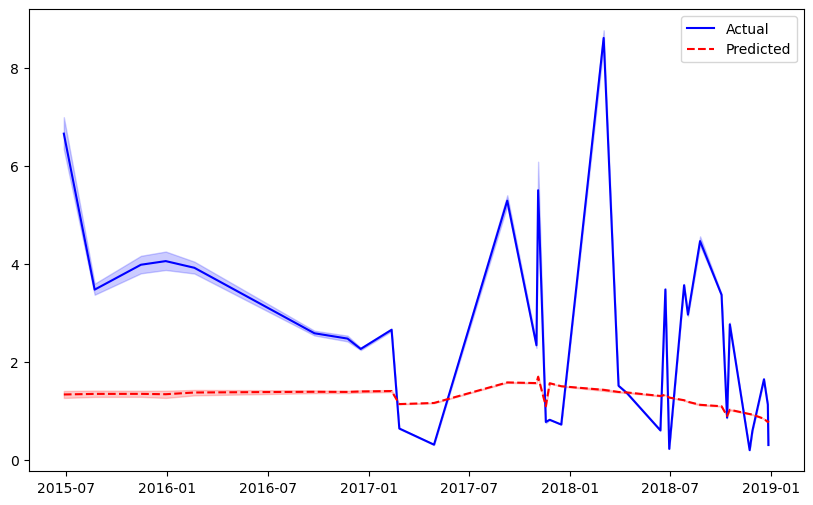

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(x = stock_train['Release Date'].to_numpy(), y = stock_train['Price_Percentage_change'].to_numpy(), label='Actual', color='blue')
sns.lineplot(x = x, y=y_pred, label='Predicted', linestyle='--', color='red')
plt.show()

In [25]:
#Random Walk models
stock_train_rw = stock_train.copy()

stock_train_rw['SalesYesterday'] = stock_train['Price_Percentage_change'].shift(1)
stock_train_rw.head()

,Sale Price,Retail Price,Release Date,Shoe Size,Price_Percentage_change,yeezy,airjordan,airforce,airmax90,airmax97,...,Red,Green,Neo,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,SalesYesterday
0,1097.0,220,2016-09-24,11.0,3.986364,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1857,NaN
1,685.0,220,2016-11-23,11.0,2.113636,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,560,3.986364
2,690.0,220,2016-11-23,11.0,2.136364,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,520,2.113636
3,1075.0,220,2016-11-23,11.5,3.886364,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,808,2.136364
4,828.0,220,2017-02-11,11.0,2.763636,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2153,3.886364


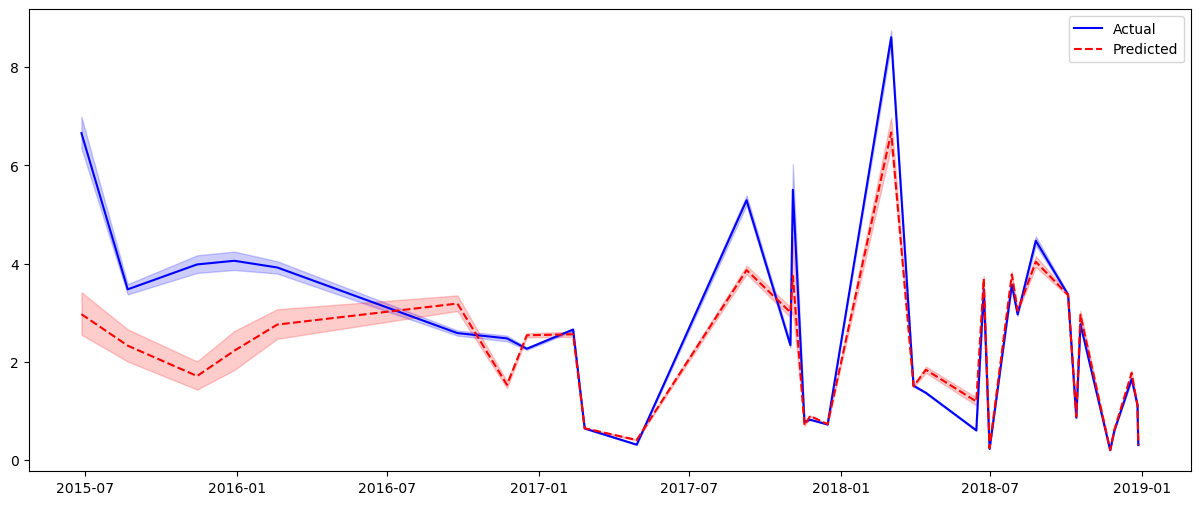

In [26]:
x = stock_train_rw['Release Date'].to_numpy()
y = stock_train_rw['Price_Percentage_change'].to_numpy()
y_pred_rw = stock_train_rw['SalesYesterday'].to_numpy()


plt.figure(figsize=(15, 6))
sns.lineplot(x = stock_train['Release Date'].to_numpy(), y = stock_train['Price_Percentage_change'].to_numpy(), label='Actual', color='blue')
sns.lineplot(x = x, y=y_pred_rw, label='Predicted', linestyle='--', color='red')
plt.show()

In [27]:
# Function to plot last 50 predictions
def plot_last_fifty_predictions(dates, predictions):
    plt.figure(figsize=(16, 4))

    # Line plot for predictions
    sns.lineplot(x=dates[-50:], y=predictions[-50:], linewidth=3, color='blue', label='Predictions')

    plt.xlabel('Release Date', fontsize=16)
    plt.ylabel('Price Percentage Change', fontsize=16)
    plt.title('Last 50 Predictions', fontsize=18)

    # Add legend
    plt.legend()

    plt.show()



In [28]:
print((abs(stock_train_rw['Price_Percentage_change'] - 
           stock_train_rw['SalesYesterday']) >= 1000).value_counts())

False    98585
dtype: int64


In [29]:
from sklearn.metrics import r2_score

# Here we slice the series using [1:] in order to discard the first entry which corresponds to a NaN.
print('Training R2:', round(r2_score(stock_train_rw['Price_Percentage_change'][1:], stock_train_rw['SalesYesterday'][1:]), 5))

Training R2: 0.51776


In [30]:
#Auto regressive models
# when shall we use AR(1) model? (Go to hand-written notes)

stock_train_ar = stock_train_rw.copy()

#Yt = (1-w)*mu + w*Y(t-1)+epsilon

ar1 = smf.ols(formula='Price_Percentage_change ~ SalesYesterday', data=stock_train_ar).fit()
print(ar1.summary())

                               OLS Regression Results                              
Dep. Variable:     Price_Percentage_change   R-squared:                       0.576
Model:                                 OLS   Adj. R-squared:                  0.576
Method:                      Least Squares   F-statistic:                 1.339e+05
Date:                     Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                             18:22:31   Log-Likelihood:            -1.3839e+05
No. Observations:                    98584   AIC:                         2.768e+05
Df Residuals:                        98582   BIC:                         2.768e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

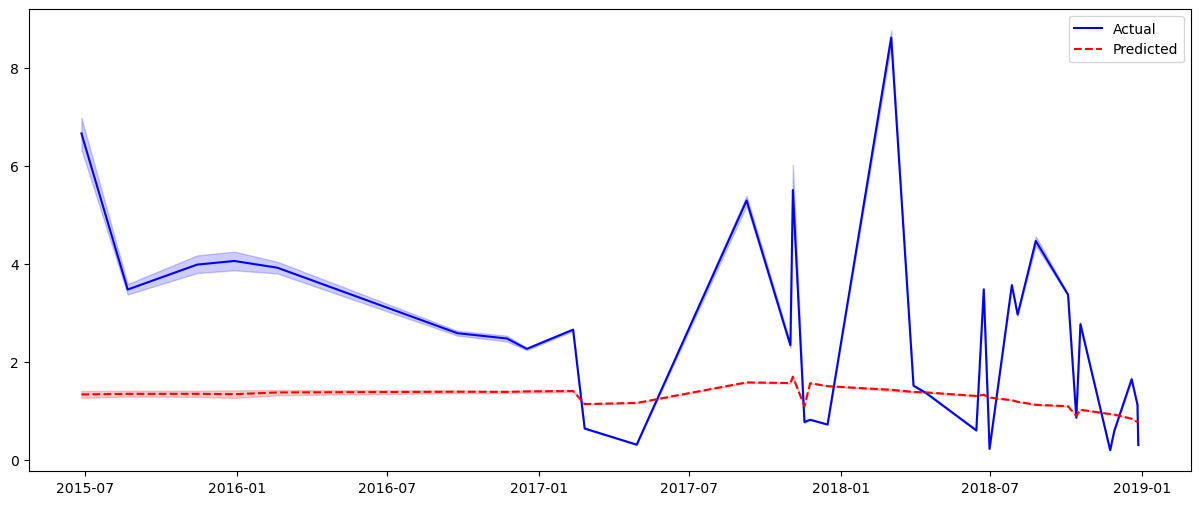

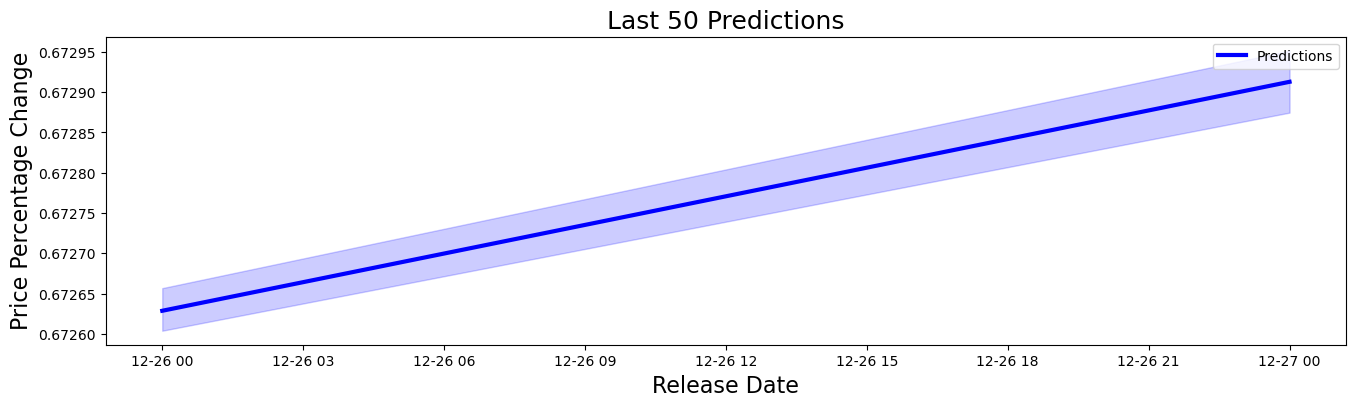

In [31]:
x = stock_train_ar['Release Date'].to_numpy()
y = stock_train_ar['Price_Percentage_change'].to_numpy()
y_pred_ar = ar1.predict(stock_train_ar).to_numpy()


plt.figure(figsize=(15, 6))
sns.lineplot(x = stock_train['Release Date'].to_numpy(), y = stock_train['Price_Percentage_change'].to_numpy(), label='Actual', color='blue')
sns.lineplot(x = x, y=y_pred, label='Predicted', linestyle='--', color='red')
plt.show()

plot_last_fifty_predictions(x, y_pred)

In [32]:
print((abs(stock_train_ar['Price_Percentage_change'] - ar1.predict(stock_train_ar))
       >= 1000).value_counts())

False    98585
dtype: int64


In [33]:
#Higher order suto regressive model
stock_train_ar['SalesTwoDaysAgo'] = stock_train['Price_Percentage_change'].shift(2)

ar2 = smf.ols(formula='Price_Percentage_change ~ SalesYesterday + SalesTwoDaysAgo', data=stock_train_ar).fit()
print(ar2.summary())

                               OLS Regression Results                              
Dep. Variable:     Price_Percentage_change   R-squared:                       0.599
Model:                                 OLS   Adj. R-squared:                  0.599
Method:                      Least Squares   F-statistic:                 7.376e+04
Date:                     Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                             18:22:39   Log-Likelihood:            -1.3557e+05
No. Observations:                    98583   AIC:                         2.711e+05
Df Residuals:                        98580   BIC:                         2.712e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [34]:
#Incorporating Seasonality 
stock_train_ar['Month'] = stock_train_ar['Release Date'].dt.month_name()
stock_train_ar['DayWeek'] = stock_train_ar['Release Date'].dt.day_name()
stock_train_ar.head()


,Sale Price,Retail Price,Release Date,Shoe Size,Price_Percentage_change,yeezy,airjordan,airforce,airmax90,airmax97,...,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,SalesYesterday,SalesTwoDaysAgo,Month,DayWeek
0,1097.0,220,2016-09-24,11.0,3.986364,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1857,NaN,NaN,September,Saturday
1,685.0,220,2016-11-23,11.0,2.113636,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,560,3.986364,NaN,November,Wednesday
2,690.0,220,2016-11-23,11.0,2.136364,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,520,2.113636,3.986364,November,Wednesday
3,1075.0,220,2016-11-23,11.5,3.886364,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,808,2.136364,2.113636,November,Wednesday
4,828.0,220,2017-02-11,11.0,2.763636,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,2153,3.886364,2.136364,February,Saturday


In [35]:
avg_increase_by_month = stock_train_ar.groupby('Month', sort=False).mean()['Price_Percentage_change']
avg_increase_by_month

C:\Users\priya\AppData\Local\Temp\ipykernel_2716\663659737.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_increase_by_month = stock_train_ar.groupby('Month', sort=False).mean()['Price_Percentage_change']


Month
September    4.906214
November     0.845892
February     0.852075
December     0.833319
April        0.469476
June         1.144388
August       3.289259
March        2.880058
July         3.565433
October      2.634669
Name: Price_Percentage_change, dtype: float64

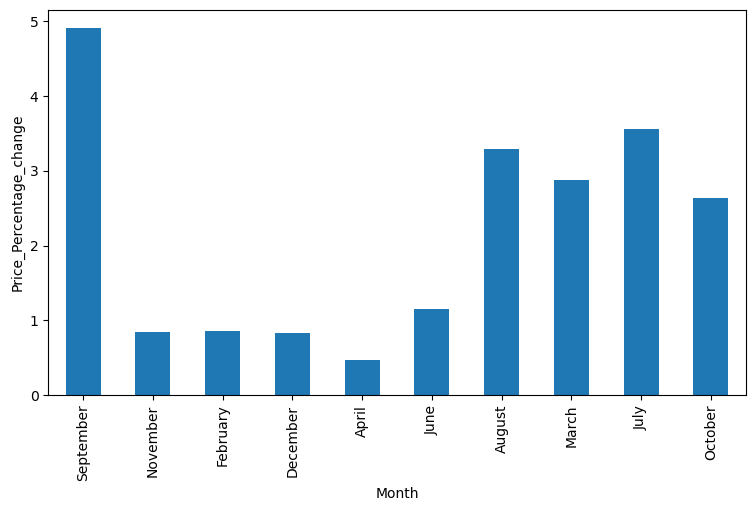

In [36]:
plt.figure(figsize=(9, 5))
avg_increase_by_month.plot(kind="bar")
plt.ylabel('Price_Percentage_change')
plt.xlabel('Month')
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_2716\3432904164.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_increase_by_day = stock_train_ar.groupby('DayWeek', sort=False).mean()['Price_Percentage_change']


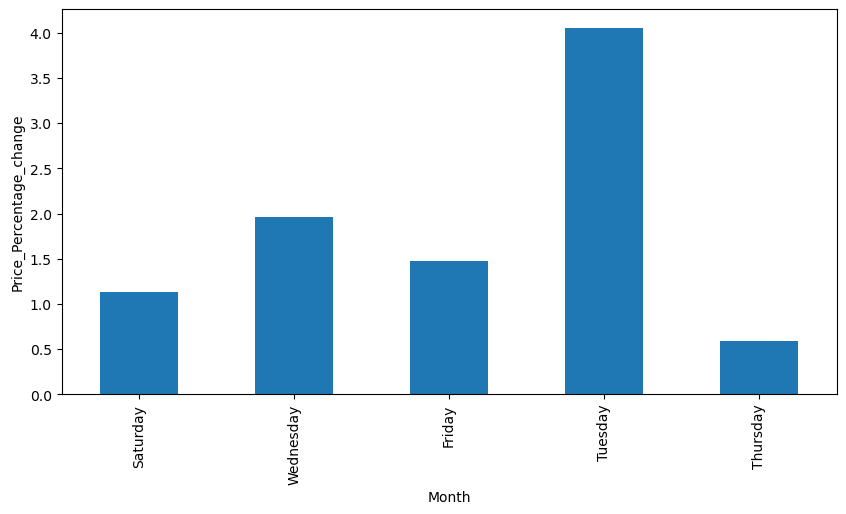

In [37]:
avg_increase_by_day = stock_train_ar.groupby('DayWeek', sort=False).mean()['Price_Percentage_change']

plt.figure(figsize=(10, 5))
avg_increase_by_day.plot(kind="bar")
plt.ylabel('Price_Percentage_change')
plt.xlabel('Month')
plt.show()

In [38]:
ar3 = smf.ols(formula='Price_Percentage_change ~ SalesYesterday + DayWeek + Month', data=stock_train_ar).fit()
print(ar3.summary())

                               OLS Regression Results                              
Dep. Variable:     Price_Percentage_change   R-squared:                       0.677
Model:                                 OLS   Adj. R-squared:                  0.677
Method:                      Least Squares   F-statistic:                 1.478e+04
Date:                     Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                             18:22:41   Log-Likelihood:            -1.2491e+05
No. Observations:                    98584   AIC:                         2.498e+05
Df Residuals:                        98569   BIC:                         2.500e+05
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [39]:
stock_train_ar.head(5)

,Sale Price,Retail Price,Release Date,Shoe Size,Price_Percentage_change,yeezy,airjordan,airforce,airmax90,airmax97,...,Orange,Tan/Brown,Pink,Blue,Colorful,Number of Sales,SalesYesterday,SalesTwoDaysAgo,Month,DayWeek
0,1097.0,220,2016-09-24,11.0,3.986364,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1857,NaN,NaN,September,Saturday
1,685.0,220,2016-11-23,11.0,2.113636,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,560,3.986364,NaN,November,Wednesday
2,690.0,220,2016-11-23,11.0,2.136364,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,520,2.113636,3.986364,November,Wednesday
3,1075.0,220,2016-11-23,11.5,3.886364,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,808,2.136364,2.113636,November,Wednesday
4,828.0,220,2017-02-11,11.0,2.763636,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,2153,3.886364,2.136364,February,Saturday


In [40]:
stock_train_ar.columns.values.tolist() 

['Sale Price',
 'Retail Price',
 'Release Date',
 'Shoe Size',
 'Price_Percentage_change',
 'yeezy',
 'airjordan',
 'airforce',
 'airmax90',
 'airmax97',
 'presto',
 'vapormax',
 'blazer',
 'zoom',
 'react',
 'California',
 'New York',
 'Oregon',
 'Florida',
 'Texas',
 'Other States',
 'Black',
 'White',
 'Grey',
 'Red',
 'Green',
 'Neo',
 'Orange',
 'Tan/Brown',
 'Pink',
 'Blue',
 'Colorful',
 'Number of Sales',
 'SalesYesterday',
 'SalesTwoDaysAgo',
 'Month',
 'DayWeek']